In [ ]:
#Validation process
#1 - Stage

RMSE: 1.0788 feet
MBE: 0.6279 feet
NSE: 0.5142
RSR: 0.6970
PBIAS: 18.76%
R²: 0.9149


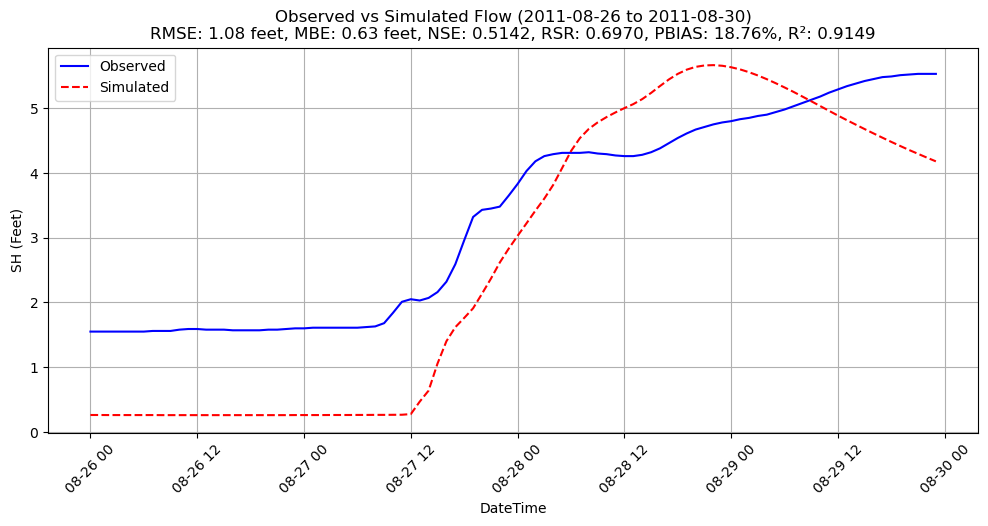

In [10]:
#calculate the nse for the new model v5
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Define file paths
filepath_o = r"C:\Github\Lab_work\Pocomoke\validation\Scenariosvs_obs.xlsx"
filepath_s = r"C:\Github\Lab_work\Pocomoke\validation\Scenariosvs_simulated2 - Copy.xlsx"

# Read observed and simulated data
observed_df = pd.read_excel(filepath_o)

simulated_df = pd.read_excel(filepath_s)
# Ensure DateTime is in datetime format
observed_df["DateTime"] = pd.to_datetime(observed_df["DateTime"])

simulated_df["DateTime"] = pd.to_datetime(simulated_df["DateTime"])
# Merge data on DateTime to align observations
merged_df = pd.merge(observed_df, simulated_df, on="DateTime", suffixes=("_obs", "_sim"))

# Filter data for the specified date range (copy2)
start_date = "2011-08-26"
end_date = "2011-08-30"
filtered_df = merged_df[(merged_df["DateTime"] >= start_date) & (merged_df["DateTime"] <= end_date)]

# Extract SH values for the filtered data
observed = filtered_df["SH(ft)_obs"].values
simulated = filtered_df["SH(ft)_sim"].values
datetime = filtered_df["DateTime"]

# Compute RMSE
rmse = np.sqrt(np.mean((observed - simulated) ** 2))

# Compute Mean Bias Error (MBE)
mbe = np.mean(observed - simulated)

# Compute NSE
nse = 1 - (np.sum((observed - simulated) ** 2) / np.sum((observed - np.mean(observed)) ** 2))

# Compute RSR (Ratio of RMSE to Standard Deviation of Observed Data)
rsr = rmse / np.std(observed)

# Compute PBIAS (Percent Bias)
pbias = 100 * np.sum(observed - simulated) / np.sum(observed)

# Compute R² (Coefficient of Determination)
r_squared = (np.corrcoef(observed, simulated)[0, 1]) ** 2

# Print all calculated metrics
print(f"RMSE: {rmse:.4f} feet")
print(f"MBE: {mbe:.4f} feet")
print(f"NSE: {nse:.4f}")
print(f"RSR: {rsr:.4f}")
print(f"PBIAS: {pbias:.2f}%")
print(f"R²: {r_squared:.4f}")

# Plot Observed vs Simulated
plt.figure(figsize=(12, 5))
plt.plot(datetime, observed, label="Observed", linestyle="-", marker="", color="blue")
plt.plot(datetime, simulated, label="Simulated", linestyle="--", marker="", color="red")
plt.xlabel("DateTime")
plt.ylabel("SH (Feet)")
plt.title(f"Observed vs Simulated Flow (2011-08-26 to 2011-08-30)\n"
          f"RMSE: {rmse:.2f} feet, MBE: {mbe:.2f} feet, NSE: {nse:.4f}, RSR: {rsr:.4f}, PBIAS: {pbias:.2f}%, R²: {r_squared:.4f}")
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# # Plot Residuals (Observed - Simulated)
# plt.figure(figsize=(12, 5))
# plt.plot(datetime, observed - simulated, label="Residuals (Obs - Sim)", color="purple")
# plt.axhline(y=0, color="black", linestyle="--")
# plt.xlabel("DateTime")
# plt.ylabel("Residual (feet)")
# plt.title("Residuals Over Time (2011-08-26 to 2011-08-30)")
# plt.legend()
# plt.xticks(rotation=45)
# plt.grid(True)
# plt.show()

In [9]:
# Display the filtered data for the date range 2011-08-26 to 2011-08-30
print("Filtered data from observed and simulated sources (2011-08-26 to 2011-08-30):")
print(filtered_df[["DateTime", "SH(ft)_obs", "SH(ft)_sim"]].to_string(index=False))


Filtered data from observed and simulated sources (2011-08-26 to 2011-08-30):
           DateTime  SH(ft)_obs  SH(ft)_sim
2011-08-26 00:00:00        1.55       0.262
2011-08-26 01:00:00        1.55       0.262
2011-08-26 02:00:00        1.55       0.261
2011-08-26 03:00:00        1.55       0.261
2011-08-26 04:00:00        1.55       0.261
2011-08-26 05:00:00        1.55       0.261
2011-08-26 06:00:00        1.55       0.261
2011-08-26 07:00:00        1.56       0.261
2011-08-26 08:00:00        1.56       0.260
2011-08-26 09:00:00        1.56       0.260
2011-08-26 10:00:00        1.58       0.260
2011-08-26 11:00:00        1.59       0.260
2011-08-26 12:00:00        1.59       0.260
2011-08-26 13:00:00        1.58       0.260
2011-08-26 14:00:00        1.58       0.260
2011-08-26 15:00:00        1.58       0.260
2011-08-26 16:00:00        1.57       0.260
2011-08-26 17:00:00        1.57       0.260
2011-08-26 18:00:00        1.57       0.260
2011-08-26 19:00:00        1.57       0.26